# Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_dataset(filename: str) -> pd.DataFrame:
    '''Load and return the content of `filename` into a Pandas DataFrame'''
    
    
    return pd.read_csv(filename, delim_whitespace=True)

In [3]:
def split_dataset(dataset: pd.DataFrame) -> (list, list, list, list):
    '''Split the `dataset` into 4 lists: 2 for training and 2 to test the prediction'''
    
    
    labels_train = dataset.values[:,-1]
    training_samples = dataset.values[:,:-1]

    theta = np.ones((labels_train.size, 1))
    training_samples = np.concatenate((training_samples, theta), axis=1)
    
    return training_samples, training_samples[:], labels_train, labels_train[:]

In [4]:
def accuracy_score(labels_test: list, prediction: list) -> float:
    '''
    Return the calculated accuracy score, in other words, the number of `right`
    predictions divided by `all` predictions
    '''


    if len(labels_test) != len(prediction):
        raise ValueError('Both `labels_test` and `predictions` must have \
                         the same length')

    test_samples = zip(prediction, labels_test)
    return sum([1 for p, l in  test_samples if p == l]) / len(labels_test)

In [5]:
class Perceptron(object):
    '''Implements the single neuron (perceptron) Artificial Neural Network (ANN)'''


    def __init__(self: object):
        '''
        Naive initializations
        '''


        self.weights = []
        self.errors = []
        self.converged = False


    def fit(self: object, training_samples: list, labels_train: list,
            learning_rate=.1, max_iterations=int(1e4), error=1e-2) -> None:
        '''
        Operate over the training set until the cost function produces a square
        error lesser than the (optional) given param `error`. Or until hit the
        (optional) given param `max_iterations`
        '''


        self.converged = False
        self.errors = []
        self.weights = np.array(np.random.random(training_samples[0].size))

        for iteration in range(max_iterations):
            squared_error = 0
            for training_sample, label in zip(training_samples, labels_train):
                diff = label - self.neuron_output(training_sample)
                squared_error += diff ** 2
                self.weights = self.weights - learning_rate * (2 * diff * -training_sample)
            if iteration < max_iterations:
                self.errors.append(squared_error)
            if squared_error / len(training_samples) < error:
                self.converged = True
                break


    def predict(self: object, test_samples: list) -> list:
        '''
        Make a prediction to the given param `test_samples`
        '''


        return [self.neuron_output(test_sample) for test_sample in test_samples]


    def neuron_output(self: object, sample: list, threshold=.5) -> float:
        '''
        Calculate the output of the ANN when presented with the values of the
        given param `feature_sample`


        Returns: The result of the activation function with the pondered
        weights applied to the values of `feature_sample`

        Returns
            1 - If the given param `input_value` is greater or equal than the
                (optional given param `threshold`.
            0 - Otherwise.
        '''


        return 0 if np.dot(sample, self.weights) < threshold else 1


    def plot_errors(self: object) -> None:
        '''
        Generate a plot with the error curve obtained during the last training
        of the perceptron
        '''


        plt.xlabel("$Iterations$")
        plt.ylabel("$Error - (MSE)$")
        plt.plot(
            self.errors, "b{}-".format("o" if len(self.errors) < 25 else ""),
            label="Mean Square Error (MSE) in the first {} iterations".
            format(len(self.errors))
        )
        plt.legend(loc="upper right")
        plt.axis([-.1, len(self.errors), -.1, max(self.errors) + .5])
        plt.grid(True)
        plt.show()

## First Example, the ```And``` case

#### Display the Dataset

In [6]:
dataset = load_dataset("and.dat")
dataset.head()

,X,Y,Output
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


#### Plot of the Dataset

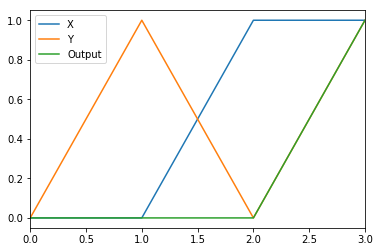

In [7]:
dataset.plot();

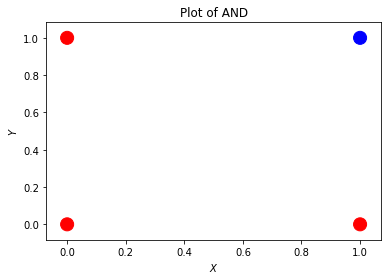

In [8]:
training_samples, testing_samples, labels_train, labels_test = split_dataset(dataset)

colors = ["red" if label == 0 else "blue" for label in labels_train]

plt.figure()
plt.scatter(training_samples[:, 0], training_samples[:, 1], s=170, color=colors)

plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Plot of AND")

plt.show()

In [9]:
clf = Perceptron()
clf.fit(training_samples, labels_train)
pred = clf.predict(testing_samples)
accuracy = accuracy_score(labels_test, pred)
print('Convergence: {}\nAccuracy: {}%\n'.format("Succeed" if clf.converged else "Fail", 100 * accuracy))

Convergence: Succeed
Accuracy: 100.0%



In [10]:
clf.weights

array([ 0.22244529,  0.17817148,  0.11477816])

In [11]:
pd.DataFrame.from_items([('Expected', labels_test), ('Obtained', pred)])

,Expected,Obtained
0,0,0
1,0,0
2,0,0
3,1,1


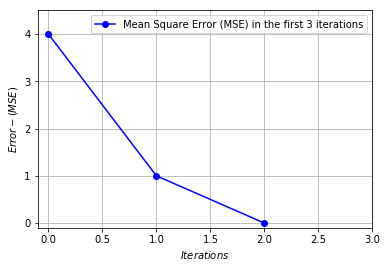

In [12]:
clf.plot_errors()

-------------------------------

## Second Example, the ```OR``` case

#### Display the Dataset

In [13]:
dataset = load_dataset("or.dat")
dataset.head()

,X,Y,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


#### Plot of the Dataset

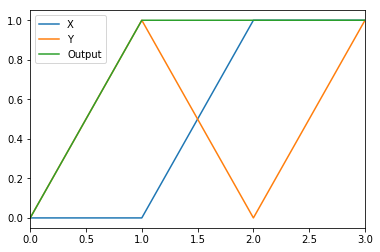

In [14]:
dataset.plot();

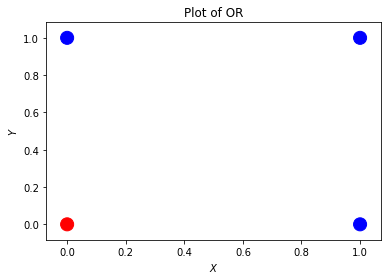

In [15]:
training_samples, testing_samples, labels_train, labels_test = split_dataset(dataset)

colors = ["red" if label == 0 else "blue" for label in labels_train]

plt.figure()
plt.scatter(training_samples[:, 0], training_samples[:, 1], s=170, color=colors)

plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Plot of OR")

plt.show()

In [16]:
clf = Perceptron()
clf.fit(training_samples, labels_train)
pred = clf.predict(testing_samples)
accuracy = accuracy_score(labels_test, pred)
print('Convergence: {}\nAccuracy: {}%\n'.format("Succeed" if clf.converged else "Fail", 100 * accuracy))

Convergence: Succeed
Accuracy: 100.0%



In [17]:
clf.weights

array([ 0.60673835,  0.61013052,  0.45691951])

In [18]:
pd.DataFrame.from_items([('Expected', labels_test), ('Obtained', pred)])

,Expected,Obtained
0,0,0
1,1,1
2,1,1
3,1,1


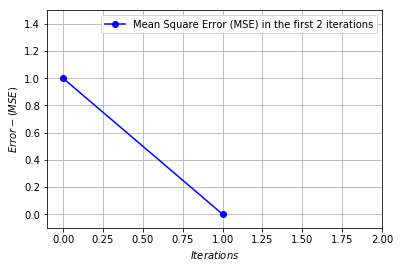

In [19]:
clf.plot_errors()

----------------------

## Third Example, the ```And with 3 entries``` case

#### Display the Dataset

In [20]:
dataset = load_dataset("3_and.dat")
dataset.head(10)

,X,Y,Z,Output
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,0,0,0
5,1,0,1,0
6,1,1,0,0
7,1,1,1,1


#### Plot of the Dataset

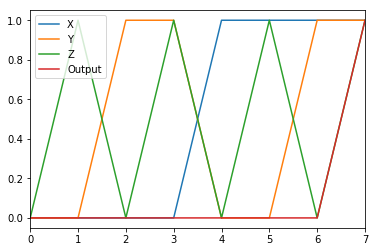

In [21]:
dataset.plot();

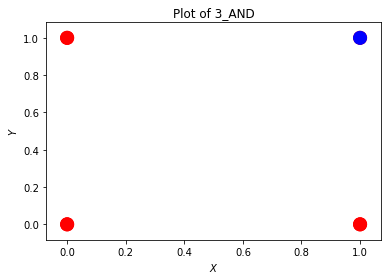

In [22]:
training_samples, testing_samples, labels_train, labels_test = split_dataset(dataset)

colors = ["red" if label == 0 else "blue" for label in labels_train]

plt.figure()
plt.scatter(training_samples[:, 0], training_samples[:, 1], s=170, color=colors)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Plot of 3_AND")

plt.show()

In [23]:
clf = Perceptron()
clf.fit(training_samples, labels_train)
pred = clf.predict(testing_samples)
accuracy = accuracy_score(labels_test, pred)
print('Convergence: {}\nAccuracy: {}%\n'.format("Succeed" if clf.converged else "Fail", 100 * accuracy))

Convergence: Succeed
Accuracy: 100.0%



In [24]:
clf.weights

array([ 0.65594655,  0.46668521,  0.34947965, -0.79784161])

In [25]:
pd.DataFrame.from_items([('Expected', labels_test), ('Obtained', pred)])

,Expected,Obtained
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1


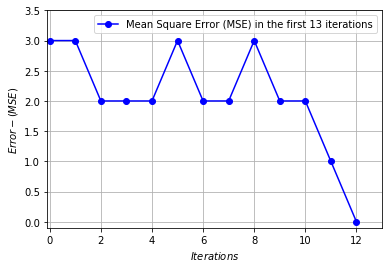

In [26]:
clf.plot_errors()

-------------------------------

## Last Example, the ```10 entries example``` case

#### Display the Dataset

In [27]:
dataset = load_dataset("10_example.dat")
dataset.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,Output
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,0


#### Plot of the Dataset

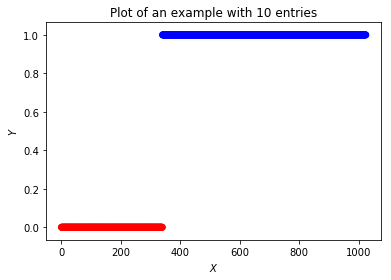

In [28]:
training_samples, testing_samples, labels_train, labels_test = split_dataset(dataset)

colors = ["red" if label == 0 else "blue" for label in labels_train]

plt.close()
plt.figure()
plt.scatter(range(1024), [label for label in labels_train], color=colors)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Plot of an example with 10 entries")

plt.show()

In [29]:
clf = Perceptron()
clf.fit(training_samples, labels_train, error=1e-3)
pred = clf.predict(testing_samples)
accuracy = accuracy_score(labels_test, pred)
print('Convergence: {}\nAccuracy: {}%\n'.format("Succeed" if clf.converged else "Fail", 100 * accuracy))

Convergence: Succeed
Accuracy: 100.0%



In [30]:
clf.weights

array([ 12.39437218,   7.86889426,   4.50491489,   2.91749798,
         1.6970776 ,   1.25965355,   0.32028557,   0.42445214,
        -0.03845681,   0.02075358, -11.75105407])

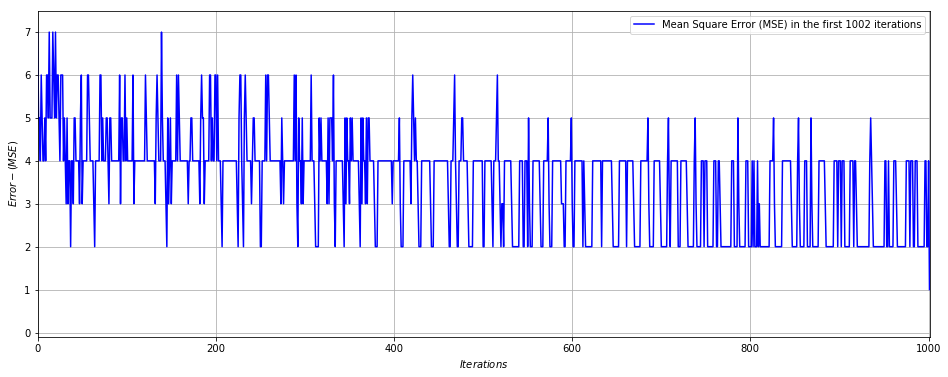

In [31]:
plt.rcParams["figure.figsize"] = [4 * 4, 3 * 2]
clf.plot_errors()

#### :wq